<a href="https://colab.research.google.com/github/mikulr/Project-2/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy import stats

#  Import and read the charity_data.csv.
import pandas as pd
url= "https://raw.githubusercontent.com/mikulr/deep_learning/main/Resources/charity_data.csv"
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [3]:
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [4]:
application_df.duplicated().sum()

0

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns={'EIN','NAME'})

In [6]:
# Determine the number of unique values in each column.
counts = application_df.nunique()
counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7fcefce24a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcefce2ead0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcefce6a050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcefce365d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcefce2e050>,
  <matplotlib.lines.Line2D at 0x7fcefce2e590>]}

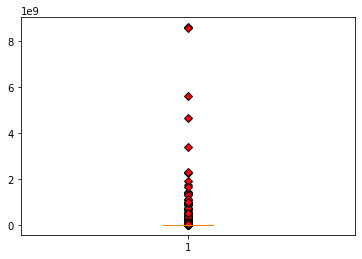

In [8]:
#check for outliers in ask amount
ask= application_df['ASK_AMT']
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(ask, flierprops=red_diamond)

In [9]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [10]:
# +70% of these having 0 this will have to be dealt with 
application_df['INCOME_AMT'].value_counts(normalize = True)

0                0.711041
25000-99999      0.109245
100000-499999    0.098370
1M-5M            0.027843
1-9999           0.021225
10000-24999      0.015831
10M-50M          0.006997
5M-10M           0.005394
50M+             0.004053
Name: INCOME_AMT, dtype: float64

In [11]:
# classify as known or unknown income (basically these become my bins here)
application_df.loc[application_df['INCOME_AMT'] != 0, 'KNOWN_INCOME'] = 'True' 
application_df.loc[application_df['INCOME_AMT'] == 0, 'KNOWN_INCOME'] = 'False' 

In [12]:
application_df=application_df.drop(columns="INCOME_AMT")


In [13]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,KNOWN_INCOME
0,T10,Independent,C1000,ProductDev,Association,1,N,5000,1,True
1,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1,True
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,True
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1,True
4,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1,True
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,N,5000,0,True
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,True
34296,T3,CompanySponsored,C2000,Preservation,Association,1,N,5000,0,True
34297,T5,Independent,C3000,ProductDev,Association,1,N,5000,1,True


In [14]:
# Look at APPLICATION_TYPE value counts for binning
# Almost 80% are of one type- will get two bins
app_count= application_df['APPLICATION_TYPE'].value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_count[app_count < 1550].index)
# application_types_to_replace

In [16]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [17]:
# Look at CLASSIFICATION value counts for binning
# top value is 50%, then 18%, 14% rest below 5% 
class_count= application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [18]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count2=application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
# class_count2

In [19]:
classifications_to_replace = list(class_count[class_count < 4836].index)
# classifications_to_replace

In [20]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [21]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,KNOWN_INCOME
0,Other,Independent,C1000,ProductDev,Association,1,N,5000,1,True
1,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1,True
2,Other,CompanySponsored,Other,ProductDev,Association,1,N,5000,0,True
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1,True
4,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1,True


In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummies= pd.get_dummies(application_df)
app_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,KNOWN_INCOME_True
0,1,5000,1,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
1,1,108590,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
2,1,5000,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
3,1,6692,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
4,1,142590,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
34295,1,5000,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
34296,1,5000,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
34297,1,5000,1,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1


In [ ]:
app_dummies.columns

In [23]:
# Split our preprocessed data into our features and target arrays
X = app_dummies.drop(["IS_SUCCESSFUL"], axis="columns")
y = app_dummies["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

Attempt 1- after initial preprocessing

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=26))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 162       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [27]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
804/804 [==============================] - 5s 5ms/step - loss: 0.6387 - accuracy: 0.6499
Epoch 2/25
804/804 [==============================] - 4s 5ms/step - loss: 0.6000 - accuracy: 0.6975
Epoch 3/25
804/804 [==============================] - 6s 7ms/step - loss: 0.5960 - accuracy: 0.7003
Epoch 4/25
804/804 [==============================] - 4s 5ms/step - loss: 0.5943 - accuracy: 0.7005
Epoch 5/25
804/804 [==============================] - 5s 6ms/step - loss: 0.5935 - accuracy: 0.7010
Epoch 6/25
804/804 [==============================] - 5s 7ms/step - loss: 0.5926 - accuracy: 0.7005
Epoch 7/25
804/804 [==============================] - 5s 7ms/step - loss: 0.5920 - accuracy: 0.7012
Epoch 8/25
804/804 [==============================] - 5s 6ms/step - loss: 0.5914 - accuracy: 0.7003
Epoch 9/25
804/804 [==============================] - 3s 4ms/step - loss: 0.5908 - accuracy: 0.7010
Epoch 10/25
804/804 [==============================] - 3s 4ms/step - loss: 0.5905 - accuracy: 0.7013

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5894 - accuracy: 0.7019 - 476ms/epoch - 2ms/step
Loss: 0.5894071459770203, Accuracy: 0.701924204826355


Attempt 2- Remove outliers

In [29]:
q = app_dummies['ASK_AMT'].quantile(0.95)
no_out= app_dummies[app_dummies['ASK_AMT'] < q]
no_out

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,KNOWN_INCOME_True
0,1,5000,1,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
1,1,108590,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
2,1,5000,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
3,1,6692,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
4,1,142590,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
34294,1,5000,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
34295,1,5000,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
34296,1,5000,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [30]:
# Split our No-outlier data into our features and target arrays
X = no_out.drop(["IS_SUCCESSFUL"], axis="columns")
y = no_out["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)

In [31]:
# RE-Fit the StandardScaler
X_scaler2 = scaler.fit(X_train2)

# RE- Scale the data
X_train_scaled2 = X_scaler.transform(X_train2)
X_test_scaled2 = X_scaler.transform(X_test2)

In [32]:
# SAME MODEL AS ABOVE

nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=26))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 162       
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# RE-Train the SAME model on new data
fit_model2 = nn_model2.fit(X_train_scaled2, y_train2, epochs=20)

Epoch 1/20
764/764 [==============================] - 2s 2ms/step - loss: 0.6343 - accuracy: 0.6546
Epoch 2/20
764/764 [==============================] - 2s 2ms/step - loss: 0.5978 - accuracy: 0.7026
Epoch 3/20
764/764 [==============================] - 1s 2ms/step - loss: 0.5935 - accuracy: 0.7059
Epoch 4/20
764/764 [==============================] - 1s 2ms/step - loss: 0.5919 - accuracy: 0.7065
Epoch 5/20
764/764 [==============================] - 1s 2ms/step - loss: 0.5905 - accuracy: 0.7062
Epoch 6/20
764/764 [==============================] - 1s 2ms/step - loss: 0.5895 - accuracy: 0.7064
Epoch 7/20
764/764 [==============================] - 2s 3ms/step - loss: 0.5888 - accuracy: 0.7068
Epoch 8/20
764/764 [==============================] - 2s 2ms/step - loss: 0.5880 - accuracy: 0.7069
Epoch 9/20
764/764 [==============================] - 1s 2ms/step - loss: 0.5858 - accuracy: 0.7085
Epoch 10/20
764/764 [==============================] - 2s 2ms/step - loss: 0.5844 - accuracy: 0.7110

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

255/255 - 0s - loss: 0.5782 - accuracy: 0.7140 - 444ms/epoch - 2ms/step
Loss: 0.5781846642494202, Accuracy: 0.7139700651168823


Attempt 3- change model options

In [36]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=25,
        step=5), activation=activation, input_dim=26))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn

In [37]:
pip install keras_tuner

     |████████████████████████████████| 133 kB 4.3 MB/s 


In [38]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [39]:
#this will run on the initial scaling before dropping outliers
tuner.search(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 23s]
val_accuracy: 0.7062390446662903

Best val_accuracy So Far: 0.7082215547561646
Total elapsed time: 00h 24m 34s
INFO:tensorflow:Oracle triggered exit


In [40]:
#Run the same thing on the data with the outliers removed
tuner.search(X_train_scaled2,y_train2,epochs=20,validation_data=(X_test_scaled2,y_test2))

Trial 72 Complete [00h 00m 45s]
val_accuracy: 0.7180210947990417

Best val_accuracy So Far: 0.7196170091629028
Total elapsed time: 00h 31m 46s
INFO:tensorflow:Oracle triggered exit


In [41]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 21,
 'num_layers': 4,
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units_0': 26,
 'units_1': 1,
 'units_2': 21,
 'units_3': 11,
 'units_4': 6}

In [42]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE